In [1]:
import pandas as pd
import numpy as np

import datetime as dt
df = pd.read_csv("./03--16-12--22.csv", header=None, usecols=[1, 2, 3, 4], names=['date', 'text', 'sentiment', 'user'], quotechar='"')
df['date'] = df['date'].map(lambda x: dt.datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ").strftime('%Y.%m.%d'))
df.head()

,date,text,sentiment,user
0,2018.12.22,"@GoodNewsBull ... yeahhh, I &quot;Get the poin...",{'sentiment': None},"{'id': 186498, 'username': 'Commander_Response..."
1,2018.12.22,$SPY gauge levels updated &amp; next week watc...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1438287, 'username': 'EquityTom', 'name..."
2,2018.12.22,$SPY $AAPL Traitor-In-Chief abandons Kurds (US...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1203337, 'username': 'raven3', 'name': ..."
3,2018.12.22,$AAPL $BA $AMZN $CAT $NFLX $LMT $NOC HOLD HOLD...,{'sentiment': {'basic': 'Bullish'}},"{'id': 276364, 'username': 'ForChristSakes', '..."
4,2018.12.22,$AAPL 155 open,{'sentiment': {'basic': 'Bullish'}},"{'id': 235795, 'username': 'GrandP', 'name': '..."


In [10]:
import pandas as pd
import numpy as np

from os import listdir
from os.path import isfile, join
import json
mypath = './TweetScraper-master/TweetScraper/Data/tweet/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df = pd.DataFrame(columns=["nbr_retweet", "user_id", "text", "usernameTweet", "datetime", "is_reply", "is_retweet", "has_media", "ID", "nbr_reply", "nbr_favorite"])

for f in onlyfiles:
    with open(mypath+f) as file:
        data = json.load(file)
        row = len(df)
        for key in set(data.keys()) & set(df.columns):
            if type(data[key]) == type(''):    
                df.loc[row,key] = data[key].replace(',', ' ')
            else:
                df.loc[row,key] = data[key]
        
    if row % 1000 == 0:
        print(row, len(onlyfiles))
df.to_csv('test_tweet.csv')
df.head()

0 32149
1000 32149
2000 32149
3000 32149
4000 32149
5000 32149
6000 32149
7000 32149
8000 32149
9000 32149
10000 32149
11000 32149
12000 32149
13000 32149
14000 32149
15000 32149
16000 32149
17000 32149
18000 32149
19000 32149
20000 32149
21000 32149
22000 32149
23000 32149
24000 32149
25000 32149
26000 32149
27000 32149
28000 32149
29000 32149
30000 32149
31000 32149
32000 32149


,nbr_retweet,user_id,text,usernameTweet,datetime,is_reply,is_retweet,has_media,ID,nbr_reply,nbr_favorite
0,0,254526647,The one thing that I can't understand about M...,Adi_Sama,2018-12-09 08:21:37,False,False,NaN,1071628410890289152,0,0
1,0,827495764049981442,Microsoft appelle à réguler les technologies ...,gfabre_digital,2018-12-07 21:15:01,False,False,NaN,1071098265892982790,0,0
2,0,159091547,Microsoft やGoogleの研究者が「顔認識技術」に規制を求めている https:...,shota_Excellent,2018-12-07 14:14:34,False,False,True,1070992457427488768,0,0
3,0,1036110327711195136,Pourquoi le passage de Microsoft Edge à Chro...,numagency,2018-12-08 09:16:00,False,False,True,1071279709751836674,0,0
4,7,15930040,"Sad to report that despite ""new microsoft "" ...",jevakallio,2018-12-07 15:25:26,False,False,NaN,1071010292962869248,23,107


In [20]:
import pandas as pd
import numpy as np

import datetime as dt
df = pd.read_csv("./test_tweet.csv", lineterminator='\n')
df['date'] = df['datetime'].map(lambda x: dt.datetime.strptime(x[:10],"%Y-%m-%d").strftime('%Y.%m.%d'))
df.head()

,Unnamed: 0,nbr_retweet,user_id,text,usernameTweet,datetime,is_reply,is_retweet,has_media,ID,nbr_reply,nbr_favorite,date
0,0,0,254526647,The one thing that I can't understand about M...,Adi_Sama,2018-12-09 08:21:37,False,False,NaN,1071628410890289152,0,0,2018.12.09
1,1,0,827495764049981442,Microsoft appelle à réguler les technologies ...,gfabre_digital,2018-12-07 21:15:01,False,False,NaN,1071098265892982790,0,0,2018.12.07
2,2,0,159091547,Microsoft やGoogleの研究者が「顔認識技術」に規制を求めている https:...,shota_Excellent,2018-12-07 14:14:34,False,False,True,1070992457427488768,0,0,2018.12.07
3,3,0,1036110327711195136,Pourquoi le passage de Microsoft Edge à Chro...,numagency,2018-12-08 09:16:00,False,False,True,1071279709751836674,0,0,2018.12.08
4,4,7,15930040,"Sad to report that despite ""new microsoft "" ...",jevakallio,2018-12-07 15:25:26,False,False,NaN,1071010292962869248,23,107,2018.12.07


In [22]:
!pip install --upgrade numpy

Requirement already up-to-date: numpy in /home/alin/anaconda3/lib/python3.6/site-packages (1.15.4)


In [2]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()


print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(df)):
    if (i+1)%100000 == 0:
        print ("Tweets %d of %d has been processed" % ( i+1, len(df) ))
    clean_tweet_texts.append(tweet_cleaner_updated(df['text'][i]))

df['text'] = pd.Series(clean_tweet_texts)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.to_csv('clean_tweet.csv')
df.head()

Cleaning the tweets...

Tweets 100000 of 222976 has been processed
Tweets 200000 of 222976 has been processed


,date,text,sentiment,user
0,2018.12.22,yeahhh get the point stockmarket is never obvi...,{'sentiment': None},"{'id': 186498, 'username': 'Commander_Response..."
1,2018.12.22,spy gauge levels updated next week watchlist a...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1438287, 'username': 'EquityTom', 'name..."
2,2018.12.22,spy aapl traitor in chief abandons kurds us al...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1203337, 'username': 'raven3', 'name': ..."
3,2018.12.22,aapl ba amzn cat nflx lmt noc hold hold hold s...,{'sentiment': {'basic': 'Bullish'}},"{'id': 276364, 'username': 'ForChristSakes', '..."
4,2018.12.22,aapl open,{'sentiment': {'basic': 'Bullish'}},"{'id': 235795, 'username': 'GrandP', 'name': '..."


In [3]:
%%bash
rm tempTagging.json

rm: cannot remove 'tempTagging.json': No such file or directory


In [4]:
# use stanfordCoreNLP
# first run:
# java -mx5g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 10000
# in core nlp folder

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

def getSentiment(t):
    if not isinstance(t, str):
        return 0
    res = nlp.annotate(t,properties={'annotators': 'sentiment','outputFormat': 'json','timeout': 1000,})
    cnt = 0
    try:
        for s in res["sentences"]:
            cnt += int(s["sentimentValue"]) - 2
    except:
        print(t)
        print(res)
        exit(0)
    return cnt

import json
import pandas as pd
import numpy as np
df = pd.read_csv('clean_tweet.csv', quotechar='"')
print(df.head())

print("Tagging the tweets...\n")
tags = []
fname='tempTagging.json'
try:
    with open(fname, 'r') as file:
        tags = json.load(file)
except:
    pass
print(len(tags))
for i in range(0,len(df)):
    if i < len(tags):
        continue
    if (i+1)%1000 == 0:
        print ("Tweets %d of %d has been processed" % ( i+1, len(df) ))
        with open(fname, 'w') as outfile:
            json.dump(tags, outfile)
    tags.append(getSentiment(df['text'][i]))
    
df['stanford'] = pd.Series(tags)
df.to_csv('sentiment_tweet.csv')
df.head()

   Unnamed: 0        date                                               text  \
0           0  2018.12.22  yeahhh get the point stockmarket is never obvi...   
1           1  2018.12.22  spy gauge levels updated next week watchlist a...   
2           2  2018.12.22  spy aapl traitor in chief abandons kurds us al...   
3           3  2018.12.22  aapl ba amzn cat nflx lmt noc hold hold hold s...   
4           4  2018.12.22                                          aapl open   

                                           sentiment  \
0                                {'sentiment': None}   
1  {'chart': {'thumb': 'https://charts.stocktwits...   
2  {'chart': {'thumb': 'https://charts.stocktwits...   
3                {'sentiment': {'basic': 'Bullish'}}   
4                {'sentiment': {'basic': 'Bullish'}}   

                                                user  
0  {'id': 186498, 'username': 'Commander_Response...  
1  {'id': 1438287, 'username': 'EquityTom', 'name...  
2  {'id': 1203337

Tweets 128000 of 222976 has been processed
Tweets 129000 of 222976 has been processed
Tweets 130000 of 222976 has been processed
Tweets 131000 of 222976 has been processed
Tweets 132000 of 222976 has been processed
Tweets 133000 of 222976 has been processed
Tweets 134000 of 222976 has been processed
Tweets 135000 of 222976 has been processed
Tweets 136000 of 222976 has been processed
Tweets 137000 of 222976 has been processed
Tweets 138000 of 222976 has been processed
Tweets 139000 of 222976 has been processed
Tweets 140000 of 222976 has been processed
Tweets 141000 of 222976 has been processed
Tweets 142000 of 222976 has been processed
Tweets 143000 of 222976 has been processed
Tweets 144000 of 222976 has been processed
Tweets 145000 of 222976 has been processed
Tweets 146000 of 222976 has been processed
Tweets 147000 of 222976 has been processed
Tweets 148000 of 222976 has been processed
Tweets 149000 of 222976 has been processed
Tweets 150000 of 222976 has been processed
Tweets 1510

,Unnamed: 0,date,text,sentiment,user,stanford
0,0,2018.12.22,yeahhh get the point stockmarket is never obvi...,{'sentiment': None},"{'id': 186498, 'username': 'Commander_Response...",-1
1,1,2018.12.22,spy gauge levels updated next week watchlist a...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1438287, 'username': 'EquityTom', 'name...",-1
2,2,2018.12.22,spy aapl traitor in chief abandons kurds us al...,{'chart': {'thumb': 'https://charts.stocktwits...,"{'id': 1203337, 'username': 'raven3', 'name': ...",-1
3,3,2018.12.22,aapl ba amzn cat nflx lmt noc hold hold hold s...,{'sentiment': {'basic': 'Bullish'}},"{'id': 276364, 'username': 'ForChristSakes', '...",-1
4,4,2018.12.22,aapl open,{'sentiment': {'basic': 'Bullish'}},"{'id': 235795, 'username': 'GrandP', 'name': '...",0


In [10]:
import ast
ast.literal_eval("{'sentiment': None}")['sentiment']

In [1]:
# use Senti4SD
# 3 cells
import pandas as pd
import numpy as np
df = pd.read_csv('clean_tweet.csv')
df2 = df['text']
df2.to_csv('prepare4SD_tweet.csv', index= False,encoding='utf-8')

In [1]:
txt=''
with open('Datasets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.csv', mode='r') as f:
    for line in f.readlines():
        s = ""
        passed = False
        passed2 = False
        for c in line[::-1]:
            if passed == False and (c == ',' or c.isspace() or c=='\n'):
                continue
            if passed2 == False and c == ',':
                passed2 = True
                c = '|'
            passed = True
            s += c
        txt += s[::-1] + '\n'
with open("Datasets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled2.csv", "w") as f:
    print(txt, file=f)

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled2.csv', header=None, delimiter="|")
print(df.head())
df2 = df[0]
print()
print(df2.head())
df2.to_csv('prepare4SD_tweet.csv', index= False,encoding='utf-8')

                                                   0  1
0  So there is no way for me to plug it in here i...  0
1                        Good case, Excellent value.  1
2                             Great for the jawbone.  1
3  Tied to charger for conversations lasting more...  0
4                                  The mic is great.  1

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: 0, dtype: object


In [14]:
reversed('ali')

'<reversed object at 0x7fa505ca07b8>'

In [ ]:
%%bash
sh Senti4SD/ClassificationTask/classificationTask.sh prepare4SD_tweet.csv sentiment_tweet.csv

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('Senti4SD/ClassificationTask/sentiment_tweet.csv')
df['Row'] = df['Row'].map(lambda x: int(x[1:]))
df = df.sort_values(by=['Row'])
df2 =  pd.read_csv('Datasets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled2.csv', header=None, delimiter="|")
df2['y'] = df['Predicted'].map({'negative': 0, 'positive': 1, 'neutral': 2})
df2 = df2[df2['y'] != 2]
print(df2.head())
df2.to_csv('sentiment_tweet.csv', index= False,encoding='utf-8')

                                                   0  1  y
1                        Good case, Excellent value.  1  1
3  Tied to charger for conversations lasting more...  0  0
4                                  The mic is great.  1  1
6  If you have several dozen or several hundred c...  0  1
7        If you are Razr owner...you must have this!  1  1


In [492]:
# combine sentiment by stanford
import pandas as pd
import numpy as np
df = pd.read_csv('sentiment_tweet.csv', quotechar='"')
del df['text']
del df['Unnamed: 0']
del df['Unnamed: 0.1']
del df['user']

import ast

def getSent(row):
    sentiment = ast.literal_eval(row['sentiment'])['sentiment']
    stanford = row['stanford']
#     if stanford == 2:
#         stanford = 1
#     if stanford == -2:
#         stanford = -1
    if sentiment == None:
        return stanford
    else:
        if sentiment['basic'] == 'Bullish':
            return 3
        if sentiment['basic'] == 'Bearish':
            return -3
        return stanford
    
df['sentiment'] = df.apply(getSent, axis=1)
del df['stanford']
df.head()
df['sentiment'].value_counts(1).loc[1]

0.04722481343283582

In [493]:
# aggregate by date
import pandas as pd
import numpy as np
# df = pd.read_csv('sentiment_tweet.csv', quotechar='"')

def getIndex(arr):
    bull = 0
    bear = 0
    for i in arr:
        if i > 0:
            bull += i
        if i < 0:
            bear += -i
    return bull-bear
    if bull == bear:
        return 0
    elif bull > bear:
        return (2*bull)/(bull+bear) - 1
    else:
        return 1 - (2*bear)/(bull+bear)

# print(len(df))
data = df.groupby('date').agg({'sentiment': getIndex})['sentiment']
# print(data.head())
data.to_csv('aggregate_tweet.csv')
data = pd.read_csv('aggregate_tweet.csv', header=None, names = ['date', 'sentiment', ])
data.head()

,date,sentiment
0,2018.03.16,-8
1,2018.03.17,14
2,2018.03.18,17
3,2018.03.19,66
4,2018.03.20,-11


<BarContainer object of 282 artists>

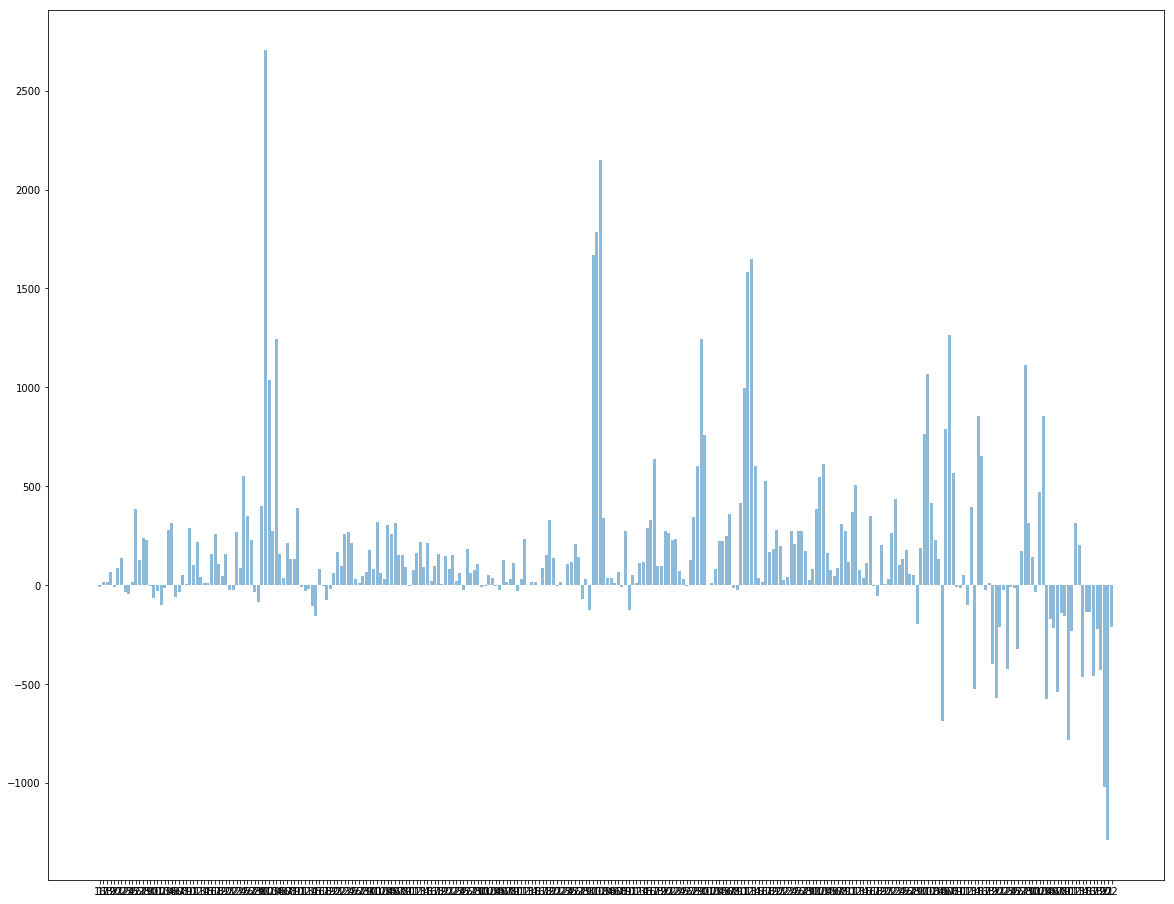

In [494]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('aggregate_tweet.csv', header=None, names = ['date', 'sentiment'])
plt.figure(figsize=(20,16))
y_pos = np.arange(len(data['date']))
plt.bar(y_pos, data['sentiment'].tolist(), align='center', alpha=0.5, tick_label=data['date'].map(lambda x: x.split('.')[-1]))

In [706]:
import pandas as pd
import numpy as np

import datetime as dt
df = pd.read_csv("./AAP_data.csv", usecols=[0,1,2,3,4,5])
df['date'] = df['date'].map(lambda x: dt.datetime.strptime(x,"%Y-%m-%d").strftime('%Y.%m.%d'))

data = pd.read_csv('./aggregate_tweet.csv', header=None, names = ['date', 'sentiment'])
data = data.set_index('date')
df = df.set_index('date')
result = pd.concat([data, df], axis=1, join='inner')
result.to_csv('./merged_result.csv')
result = pd.read_csv('./merged_result.csv', usecols=[1,5,6])
result.head()

,sentiment,close,volume
0,-8,116.4330,1354443
1,66,115.6743,813029
2,-11,114.0570,636041
3,87,115.0454,689637
4,138,111.5795,1042421


In [2]:
import pandas as pd
import numpy as np

import datetime as dt
df = pd.read_csv("./AAP_data.csv", usecols=[0,1,2,3,4,5])
df['date'] = df['date'].map(lambda x: dt.datetime.strptime(x,"%Y-%m-%d").strftime('%Y.%m.%d'))

data = pd.read_csv('./aggregate_tweet.csv', header=None, names = ['date', 'sentiment'])
data = data.set_index('date')
df = df.set_index('date')
result = pd.concat([data, df], axis=1, join='inner')
result.to_csv('./merged_result.csv')
result = pd.read_csv('./merged_result.csv', usecols=[1,5,6])
result.head()


num = 5

for i in range(1,num):
#     result['open'+str(i)] = result.open.shift(i)
#     result['high'+str(i)] = result.high.shift(i)
#     result['low'+str(i)] = result.low.shift(i)
    result['close'+str(i)] = result.close.shift(i)
#     result['volume'+str(i)] = result.volume.shift(i)
result['output'] = result.close.shift(-1)    

result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
try:
    result = result.drop(columns=['date'])
except:
    pass

up = 1
down = -1
def setLabel(row):
    yesterday = row['close']
    today = row['output']
    if yesterday < today:
        return up
    if today < yesterday:
        return down
    return 0

def getLabel(l, i):
    def setLabelX(row):
        if i == 1:
            if row[l+str(i)] > row[l]:
                return down
            else:
                return up
        else:
            if row[l+str(i)] > row[l+str(i-1)]:
                return down
            else:
                return up
    return setLabelX
    
result['output'] = result.apply(setLabel, axis=1)


print(result.head())

for i in range(num-1,0,-1):
    result['close'+str(i)] = result.apply(getLabel('close', i), axis=1)
#     result['volume'+str(i)] = result.apply(getLabel('volume', i), axis=1)
    
    
    
    

result1 = result[result['output'] == 1][:79]
result2 = result[result['output'] == -1][:]
result = pd.concat([result1, result2])
    
result.to_csv('./ML_cols.csv',encoding='utf-8')
result

result['output'].value_counts()

   sentiment     close   volume    close1    close2    close3    close4  \
0        138  111.5795  1042421  115.0454  114.0570  115.6743  116.4330   
1        -37  110.7105  1085896  111.5795  115.0454  114.0570  115.6743   
2        384  114.6359  1008809  110.7105  111.5795  115.0454  114.0570   
3        127  114.8756  1402835  114.6359  110.7105  111.5795  115.0454   
4        238  115.8445  1047520  114.8756  114.6359  110.7105  111.5795   

   output  
0      -1  
1       1  
2       1  
3       1  
4       1  


 1    79
-1    79
Name: output, dtype: int64

In [5]:
from sklearn import preprocessing;
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

def showpred(y_test, y_pred):
    print(len(X_train))
    print(X_train.head())
    print()
    print(y_train.head())
    res = pd.DataFrame(data={'test':y_test.tolist(), 'pred':y_pred.tolist()})
    print(accuracy_score(y_test, y_pred))
    return res.head()

data = pd.read_csv('./ML_cols.csv')
X = data[data.columns[1:len(data.columns)-1]].copy()
y = data['output'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.SVC(C=1, gamma=0.00001, kernel='rbf')
# clf = tree.DecisionTreeClassifier()
# clf = LogisticRegression(random_state=0, solver='saga', max_iter=600, multi_class='multinomial')
# clf = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=.2, activation='relu', max_iter=1000)

from sklearn.metrics import accuracy_score
y_pred = clf.fit(X_train, y_train).predict(X_test)
showpred(y_test, y_pred)

126
     sentiment     close   volume  close1  close2  close3  close4
137        263  164.7067  1425954       1       1       1      -1
55        2147  143.1543   654039       1      -1       1       1
126        604  165.3279   995784      -1      -1      -1       1
84         288  112.0090   946570       1      -1      -1       1
154       -462  158.7790  1223775      -1      -1      -1       1

137   -1
55     1
126   -1
84    -1
154   -1
Name: output, dtype: int64
0.5


,test,pred
0,-1,1
1,1,1
2,-1,-1
3,-1,1
4,-1,1
